In [1]:
import networkx as nx
import gzip
import thinkstats2
import thinkplot
import math
import matplotlib.pyplot as plt

"""This is from problem 4.2"""
def powerlaw_graph(n = 4039, k = 22, p = 500):
    g = nx.powerlaw_cluster_graph(n,k,p)
    
    return g

"""
The following code is from the textbook:

The first creates a graph from the data in the included file "actor.dat.gz". The second function is the
all_pairs function in chapter 2

"""

def read_actor_network(filename, n=None):
    G = nx.Graph()
    
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            
            if n and i >= n:
                break
                
    return G

def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v
                
G = read_actor_network('actor.dat.gz')                             # Generates a graph using read_actor_network

selected_component = max(nx.connected_components(G), key = len)    # Produces the longest connected network

The above code generates all the data needed in order to produce the graphs required in this exercise. The remaining code manipulates the data from the graph $G$ and creates the needed plots.

In [3]:
"""
This generates the manipulated data such as degree per node, PMF and CDF
"""

degrees = [G.degree(u) for u in selected_component]

pmf_deg = thinkstats2.Pmf(degrees)  # This generates a dictionary! key:value
cdf_deg = thinkstats2.Cdf(degrees)  # Also generates a dictionary(?)

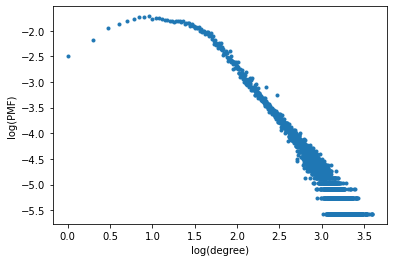

In [4]:
"""
The following code generates the PMF plot in log-log
"""

log_x = [math.log10(k) for k in pmf_deg]
log_y = [math.log10(pmf_deg[k]) for k in pmf_deg]

plt.plot(log_x,log_y,'.')
plt.xlabel('log(degree)')
plt.ylabel('log(PMF)')
plt.show()

This shows the PMF of the data set plotted in a log-log scale.

In [5]:
"""
The following code manipulates the data required for the CDF plots
"""

x_values, y_values = cdf_deg.xs, cdf_deg.ps # This unpacks cdf_deg into x_values and y_values
                                            # Using cdf_deg.Render() also includes the zeroth entry! (Do not use)

log_y_values = [math.log10(u) for u in y_values]
log_x_values = [math.log10(u) for u in x_values]

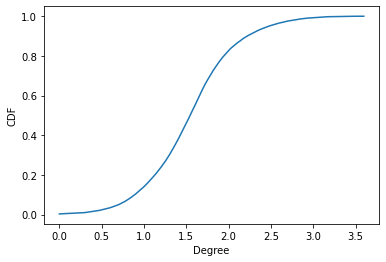

In [6]:
"""
This generates the CDF plot in a log-x scale
"""

plt.plot(log_x_values, y_values)
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.show()

This shows the general shape of the distribution.

No handles with labels found to put in legend.


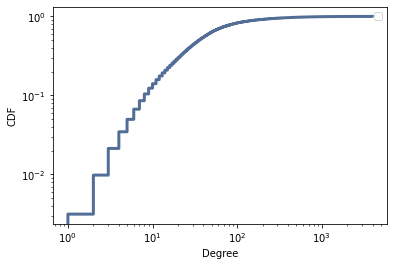

<Figure size 576x432 with 0 Axes>

In [7]:
thinkplot.cdf(cdf_deg)
thinkplot.show(ylabel='CDF', xlabel='Degree', xscale='log', yscale='log')

This shows the distribution in a log-log scale.